## Solving Regression Problem using ANN

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing=fetch_california_housing()

In [3]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
X=pd.DataFrame(data=housing.data,columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y=pd.DataFrame(data=housing.target,columns=['target'])

In [6]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
X.shape

(20640, 8)

In [8]:
y.shape

(20640, 1)

In [9]:
X.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [12]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.25,random_state=42)

In [14]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 6)
(5160, 6)
(11610, 6)
(3870, 6)


In [15]:
LAYERS = [
    tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model=tf.keras.models.Sequential(LAYERS)

In [17]:
LOSS='mse'
OPTIMIZER='sgd'
model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 581 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
scaler=StandardScaler()

In [20]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [21]:
EPOCHS=20
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1796 - val_loss: 0.4735
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4751 - val_loss: 0.4509
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.4538 - val_loss: 0.5293
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.4457 - val_loss: 0.7027
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.4393 - val_loss: 0.9154
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.4427 - val_loss: 0.4731
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.4341 - val_loss: 0.4036
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.4192 - val_loss: 0.4166
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.4142 - val_loss: 0.4013
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.4443 - val_loss: 0.4028
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.4338 - val_loss: 0.3970
Epoch 12/20
363/363 ━━━━━━━━━━━━━━

In [22]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.714737,0.473538
1,0.484109,0.450878
2,0.457159,0.529304
3,0.446529,0.702713
4,0.439449,0.915392
5,0.441772,0.473078
6,0.436083,0.403553
7,0.430314,0.416636
8,0.427640,0.401280
9,0.428279,0.402836


<Axes: >

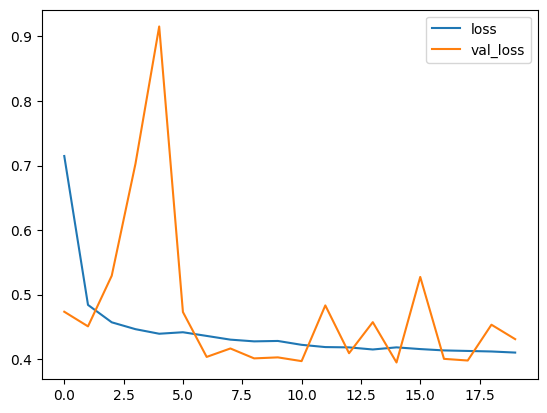

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.4297


0.43823280930519104

In [25]:
X_test.shape

(5160, 6)

In [26]:
new=X_test[0]

In [27]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [28]:
new.shape

(6,)

In [29]:
new.reshape((1,6)).shape

(1, 6)

In [30]:
model.predict(new.reshape((1,6)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.8911314]], dtype=float32)

### Model with Callback

In [31]:
model_2=tf.keras.models.Sequential(LAYERS)

In [32]:
LOSS='mse'
OPTIMIZER=tf.keras.optimizers.SGD(learning_rate=1e-3)

In [33]:
model_2.compile(loss=LOSS,optimizer=OPTIMIZER)

In [34]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(filepath="my_keras_model.keras",save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
Tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [35]:
history=model_2.fit(X_train,y_train,epochs=20,validation_data=[X_valid,y_valid],callbacks=[checkpoint_cb,early_stopping_cb,Tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4220 - val_loss: 0.3879
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4085 - val_loss: 0.3870
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4063 - val_loss: 0.3866
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.4085 - val_loss: 0.3876
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.3829 - val_loss: 0.3866
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3936 - val_loss: 0.3864
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.3927 - val_loss: 0.3871
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.4204 - val_loss: 0.3866
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4147 - val_loss: 0.3863
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4133 - val_loss: 0.3858
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.3964 - val_loss: 0.3864
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0

<Axes: >

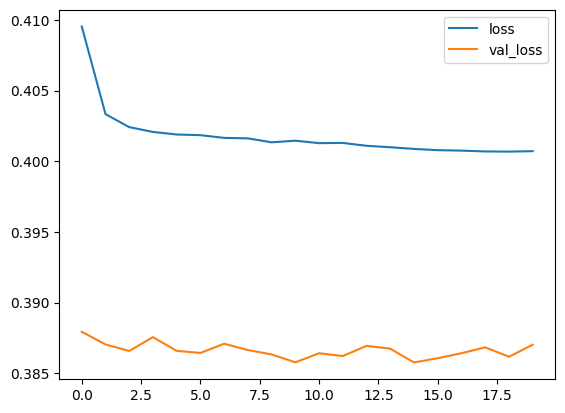

In [36]:
pd.DataFrame(history.history).plot()

In [41]:
# !rm -rf logs
%reload_ext tensorboard

In [42]:
%tensorboard --logdir="logs"

Reusing TensorBoard on port 6006 (pid 28008), started 0:03:28 ago. (Use '!kill 28008' to kill it.)

In [43]:
model.predict((new.reshape(1,6)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.8448745]], dtype=float32)